In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

In [2]:
# year = 1997
# allweather = pd.DataFrame()
# while year <= 2006:
#     a = pd.read_csv(f'E:/PyCharmProjects/PogodaGis/pogodas/{year}.csv')
#     allweather = pd.concat([allweather, a], sort=False, axis=0)
#     year += 1
# year = 2009
# while year <= 2023:
#     a = pd.read_csv(f'E:/PyCharmProjects/PogodaGis/pogodas/{year}.csv')
#     allweather = pd.concat([allweather, a], sort=False, axis=0)
#     year += 1
# allweather.to_csv('allweather.csv', index=False)

# все годы
      t  - температура
      p  - давление
      ws - скорость ветра
    wdir - направление ветра

In [3]:
# weather = pd.read_csv('allweather.csv')
# weather = weather.astype({'Число': 'datetime64[ns]'})
# weather['year'] = weather['Число'].dt.year
# weather['month'] = weather['Число'].dt.month
# weather['day'] = weather['Число'].dt.day
# weather = weather.set_index(['year','month','day'])
# weather['wspeed'] = weather['Ветер(день)'].apply(lambda row: row.split()[1].strip('м/с') if len(row.split()) > 1 else '0')
# weather['wdir'] = weather['Ветер(день)'].apply(lambda row: row.split()[0])
# weather = weather.drop(labels=['Число', 'Ветер(вечер)', 'Ветер(день)'], axis=1)
# weather = weather.rename(columns={'Температура(день)':'t(day)',\
#                                   'Температура(вечер)':'t(night)',\
#                                   'Давление(день)': 'p(day)',\
#                                   'Давление(вечер)': 'p(night)'})
# weather.to_csv('weather.csv')

между дневными и вечерними ветрами в предоставленых данных оказалось полное совпадение

In [4]:
weather = pd.read_csv('weather.csv', index_col = ['year','month','day'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8759 entries, (1997, 4, 1) to (2023, 7, 31)
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   t(day)    8759 non-null   int64 
 1   p(day)    8759 non-null   int64 
 2   t(night)  8759 non-null   int64 
 3   p(night)  8759 non-null   int64 
 4   wspeed    8759 non-null   int64 
 5   wdir      8759 non-null   object
dtypes: int64(5), object(1)
memory usage: 438.8+ KB


# направление ветра

### процентное отношение направлений за все годы

In [29]:
directs = ["Восточный",'Западный',
           "Северный","Северо-Восточный","Северо-Западный",
           "Штиль",
           "Южный","Юго-Восточный","Юго-Западный"]
shortdirects = ['В', 'З', 'С', 'СВ', 'СЗ', 'Ш', 'Ю', 'ЮВ', 'ЮЗ']
colors = ['#E7EB0A', '#1AD90D',
          '#0722ED', '#a064b0', '#117E7D',
          '#77877C',
          '#E11414', '#E4800F', '#7E7711']

In [6]:
# считаем количество всех ветров
dirall = weather.groupby('wdir')\
    .agg({'wdir': 'count'})\
    .rename(columns={'wdir': 'count'})\
    .sort_index()
# добавляем столбец с процентной популярностью от общего числа
dirall['percent'] = dirall['count'].div(dirall['count'].sum()).mul(100).round(2)

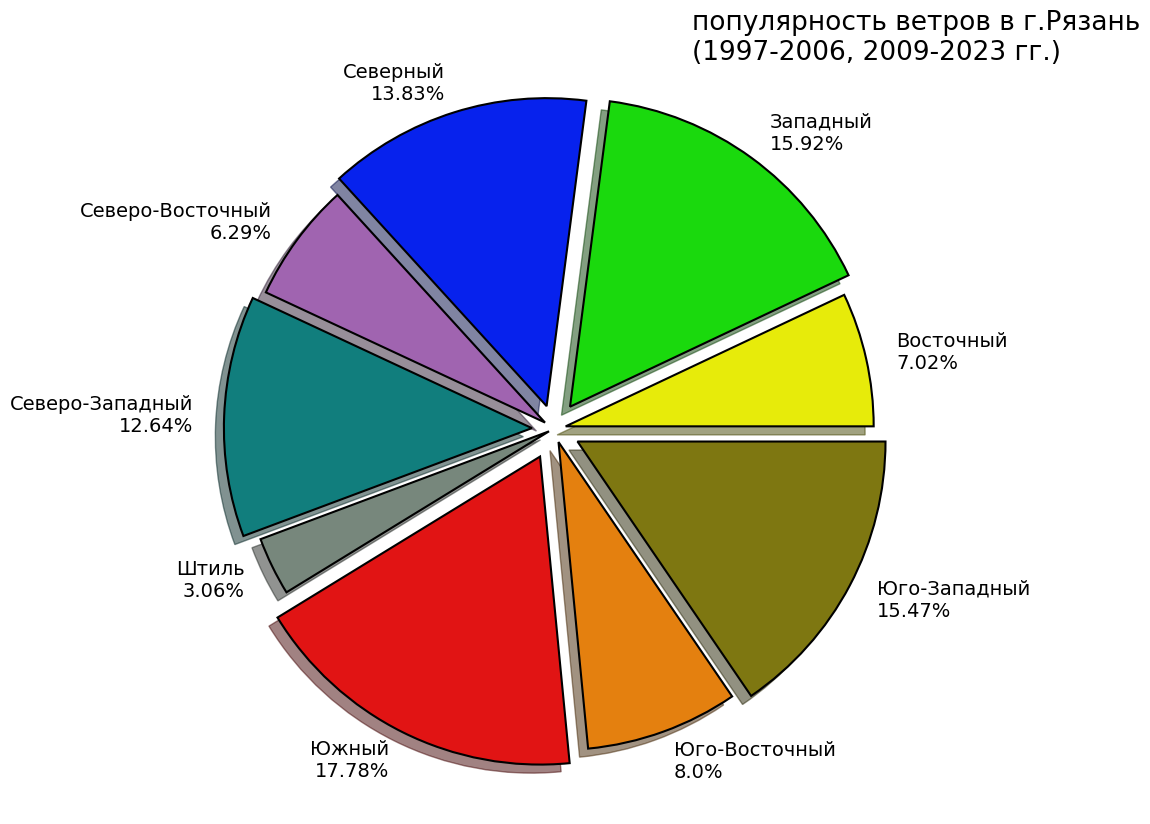

In [30]:
fig1 = plt.figure(figsize=(10, 10))
axdirall = fig1.add_subplot()
explode = [(i / max(dirall['count'].values) / 10) for i in dirall['count'].values]
wedges, texts = axdirall.pie(dirall['percent'], explode=explode, colors=colors,shadow=True)
for wedge in wedges:
    wedge.set_linewidth(1.5)
    wedge.set_edgecolor('black')

for i in range (len(texts)):
    texts[i].set_fontsize(14)
    dirr, per = directs[i], dirall['percent'].iloc[i]
    texts[i].set_text(f'{dirr}\n{per}%')
axdirall.annotate(f'популярность ветров в г.Рязань\n(1997-2006, 2009-2023 гг.)', (0.45, 1.2), fontsize=19);

### процентное отношение направлений по каждому году отдельно

###### сохраняем данные по годам(проценты) в json

In [8]:
# dir_wind_percent_year = pd.DataFrame([], index=shortdirects)
# x = weather.groupby(['year', 'wdir']).agg({'wdir': 'count'})
# for i, j in weather.groupby('year'):
#     dir_wind_percent_year[i] = x.loc[i]['wdir'].div(x.loc[i].values.sum()).mul(100).round(2)
# dir_wind_percent_year['total'] = dirall['percent'].values
# dir_wind_percent_year.to_json('dir_wind_percent_year.json')

In [9]:
dwpy = pd.read_json('napravlenie_vetrov/dir_wind_percent_year.json')
dwpy

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,total
В,11.94,6.40,6.88,7.30,7.37,4.11,7.26,6.01,8.06,4.67,...,3.60,9.62,3.66,8.91,1.95,3.86,7.24,8.26,6.67,7.02
З,14.18,18.02,18.05,16.01,17.00,20.27,16.76,13.11,13.89,18.96,...,16.90,13.46,18.31,15.32,16.43,19.83,18.66,13.77,12.86,15.92
С,14.55,11.05,12.03,13.20,8.22,14.79,7.54,14.75,9.44,15.11,...,16.90,16.21,14.65,14.76,12.26,9.09,11.14,16.25,12.38,13.83
СВ,7.09,5.23,6.88,6.46,5.10,7.40,4.47,8.47,5.28,6.59,...,6.09,6.32,2.54,6.96,6.96,4.41,5.29,6.61,11.43,6.29
СЗ,14.18,11.92,11.17,12.08,16.15,14.25,11.45,13.11,13.33,13.46,...,15.51,11.81,14.65,13.37,14.76,11.29,11.98,13.50,13.81,12.64
Ш,1.49,2.91,6.88,3.93,3.40,0.82,2.51,2.73,5.83,4.40,...,6.65,1.92,1.69,3.62,1.39,2.20,3.06,2.48,1.90,3.06
Ю,14.55,17.44,18.34,15.45,15.30,16.16,24.86,15.57,13.61,17.86,...,12.74,18.41,21.41,16.99,23.40,20.11,20.33,16.53,21.43,17.78
ЮВ,6.34,9.30,7.74,8.71,9.07,7.12,5.59,9.56,13.61,4.40,...,4.99,7.42,8.17,9.19,5.01,12.12,7.80,9.09,6.67,8.00
ЮЗ,15.67,17.73,12.03,16.85,18.41,15.07,19.55,16.67,16.94,14.56,...,16.62,14.84,14.93,10.86,17.83,17.08,14.48,13.50,12.86,15.47


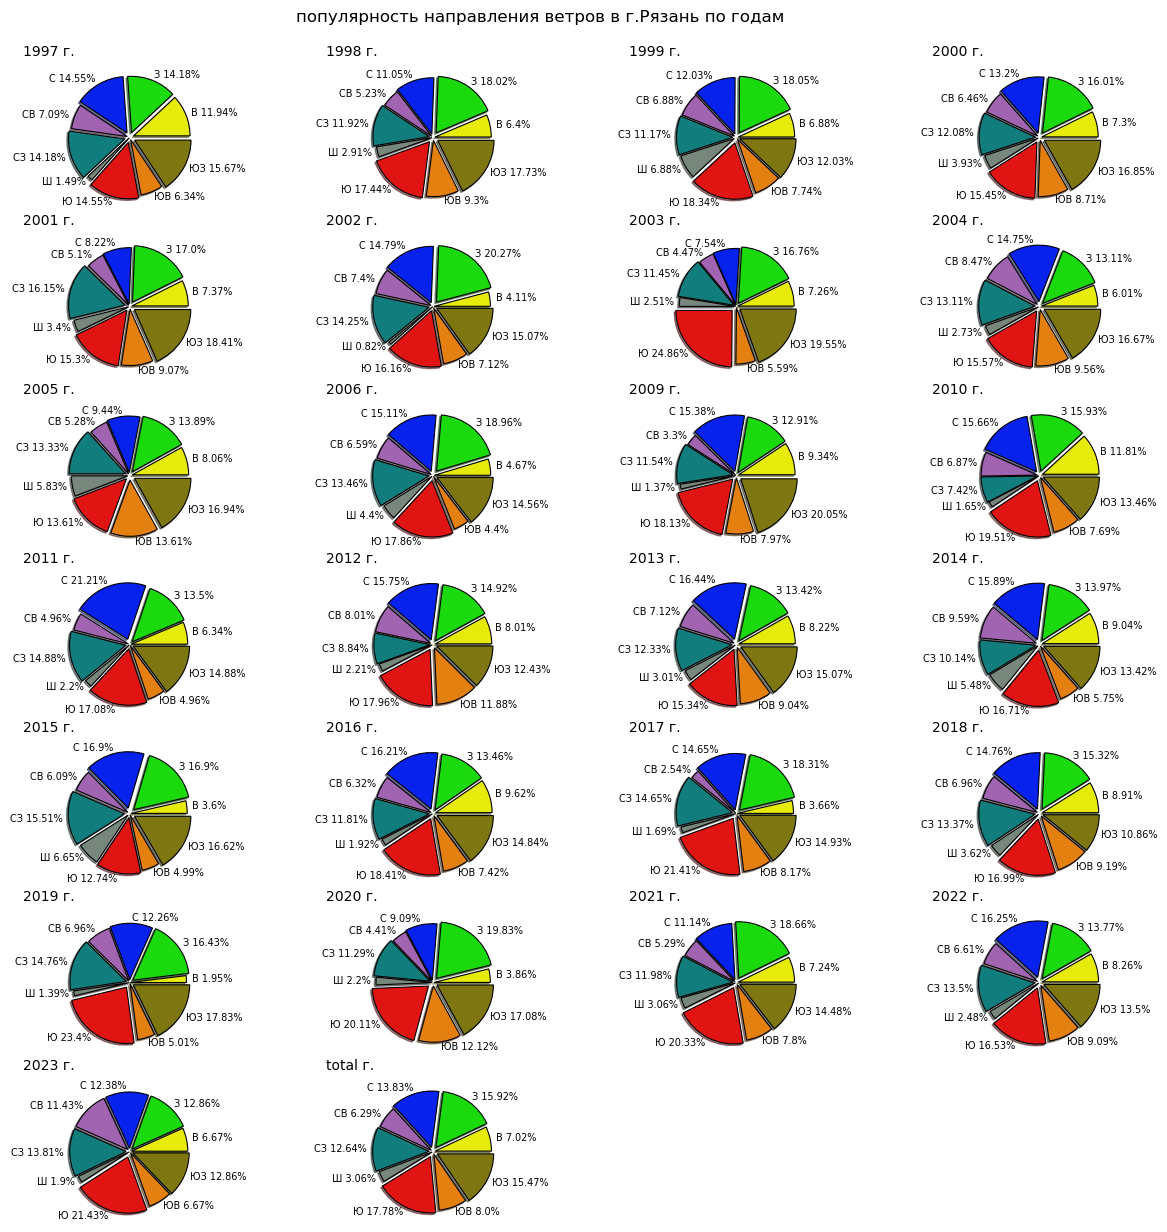

In [31]:
fig2 = plt.figure(figsize=(15, 15))
fig2.text(0.32, 0.91, f'популярность направления ветров в г.Рязань по годам', fontsize=12)
num = 1
for i in dwpy.columns:
    explode = [k / dwpy[i].max() / 10 for k in dwpy[i]]
    ax2 = fig2.add_subplot(7, 4, num)
    wedges, texts = ax2.pie(dwpy[i], explode=explode, colors=colors, shadow=True)
    for wedge in wedges:
        wedge.set_linewidth(0.8)
        wedge.set_edgecolor('black')
    for t in range (len(texts)):
        texts[t].set_fontsize(7)
        dirr, per = shortdirects[t], dwpy[i].iloc[t].round(2)
        texts[t].set_text(f'{dirr} {per}%')
    ax2.annotate(f'{i} г.', (0, 0), xytext=(-1.9, 1.45), fontsize=10)    
    num += 1

###### графики направлений ветра в процентном отношении по годам

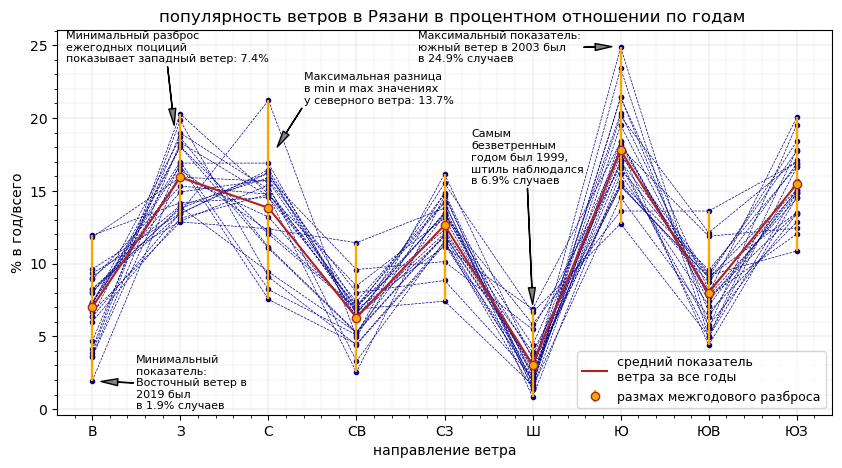

In [11]:
fig3 = plt.figure(figsize=(10, 5))
ax_dwpy = fig3.add_subplot()
for i in dwpy.columns[::]:
    if i == 'total':
        ax_dwpy.plot(dwpy[i], color = 'firebrick', lw = 1.5, label='средний показатель\nветра за все годы')
    else:
        ax_dwpy.plot(dwpy[i], color = 'DarkBlue', marker='.', ls='--', lw = 0.5)

y = np.array(dwpy['total'])
pogrmin = y - np.array([dwpy.loc[i].min() for i in shortdirects])
pogrmax = np.array([dwpy.loc[i].max() for i in shortdirects]) - y
pogr = [pogrmin, pogrmax]
axerr = ax_dwpy.errorbar(shortdirects, y, yerr=pogr,\
                        color='orange',\
                        ecolor='orange',\
                        elinewidth=1.7,\
                        fmt='o',\
                        markeredgecolor='brown',\
                        label='размах межгодового разброса')

ax_dwpy.minorticks_on()
ax_dwpy.grid(which='minor', lw=0.1)
ax_dwpy.grid(which='major', lw=0.2)
ax_dwpy.set_xlabel('направление ветра')
ax_dwpy.set_ylabel('% в год/всего')

ax_dwpy.annotate(f'Максимальный показатель:\nюжный ветер в 2003 был\nв 24.9% случаев', \
                xy=(5.9, 24.9), xytext=(3.7, 23.85), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Минимальный\nпоказатель:\nВосточный ветер в\n2019 был\nв 1.9% случаев', \
                xy=(0.1, 1.9), xytext=(0.5, 0), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Максимальная разница\nв min и max значениях\nу северного ветра: 13.7%',\
                 xy=(2.1, 18), xytext=(2.4, 21), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Минимальный разброс\nежегодных поциций\nпоказывает западный ветер: 7.4%',\
                 xy=(0.93, 19.5), xytext=(-0.3, 23.85), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpy.annotate(f'Самым\nбезветренным\nгодом был 1999,\nштиль наблюдался\nв 6.9% случаев',\
                 xy=(5, 7.2), xytext=(4.3, 15.5), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
fig3.suptitle(f'популярность ветров в Рязани в процентном отношении по годам', x=0.52,y=0.92, fontsize=12)
ax_dwpy.legend(loc=4, fontsize=9);

### процентное отношение направлений по каждому месяцу отдельно

###### сохраняем данные по год-месяц(проценты) в json

In [12]:
# dir_wind_percent_yearmonth = pd.DataFrame([], index=shortdirects)
# x = weather.groupby(['year', 'month', 'wdir']).agg({'wdir': 'count'})
# for i, j in weather.groupby(['year', 'month']):
#     y, m = i[0], i[1]
#     dir_wind_percent_yearmonth[f'{y}.{m}'] = x.loc[i[0]].loc[i[1]]['wdir(day)'].div(x.loc[i[0]].loc[i[1]].values.sum()).mul(100).round(2)
# dir_wind_percent_yearmonth.fillna(value=0.0, inplace=True)
#dir_wind_percent_yearmonth.to_json('dir_wind_percent_year.month.json')

In [13]:
dwpym = pd.read_json('napravlenie_vetrov/dir_wind_percent_year.month.json', convert_axes=False)

### процентное отношение направлений по месяцам

###### сохраняем данные по месяцам в json

In [14]:
# dir_wind_percent_month = pd.DataFrame([], index=shortdirects)
# x = weather.groupby(['month', 'wdir(day)']).agg({'wdir(day)': 'count'})\
#     .rename(columns={'wdir(day)':'count'})\
#     .reset_index('wdir(day)')
# for i in x.index.unique():
#     dir_wind_percent_month[i] = x.loc[i][x.loc[i].columns[1]]\
#                                 .div(x.loc[i][x.loc[i].columns[1]].sum())\
#                                 .mul(100).round(2).values
# dir_wind_percent_month['total'] = dir_wind_percent_month.sum(axis=1).div(dir_wind_percent_month.shape[1]).round(2)
# dir_wind_percent_month.to_json('dir_wind_percent_month.json')

In [15]:
dwpm = pd.read_json('napravlenie_vetrov/dir_wind_percent_month.json')
dwpm

,1,2,3,4,5,6,7,8,9,10,11,12,total
В,3.37,6.63,6.93,9.40,7.22,7.47,8.95,9.34,5.49,4.91,7.46,6.95,7.01
З,15.65,12.95,16.98,16.38,14.44,15.90,16.71,16.35,19.15,17.87,14.51,13.90,15.90
С,9.85,11.14,10.60,13.69,18.24,18.21,16.45,18.13,18.73,12.96,9.44,8.04,13.79
СВ,3.78,1.96,3.80,8.32,8.14,8.42,8.42,12.50,7.18,4.77,4.08,3.54,6.24
СЗ,9.18,12.80,12.50,11.41,14.04,16.71,13.29,14.29,15.63,11.87,11.41,8.58,12.64
Ш,4.59,2.11,2.17,1.61,2.10,2.85,4.08,2.75,2.39,3.00,3.80,5.18,3.05
Ю,23.62,25.15,22.15,17.72,13.39,11.68,13.95,10.99,12.11,16.78,22.54,24.11,17.85
ЮВ,10.39,10.99,7.07,6.98,7.74,5.84,6.71,6.59,7.18,7.91,8.45,10.49,8.03
ЮЗ,19.57,16.27,17.80,14.50,14.70,12.91,11.45,9.07,12.11,19.92,18.31,19.21,15.49


###### популярность ветров в Рязани в процентном отношении по месяцам

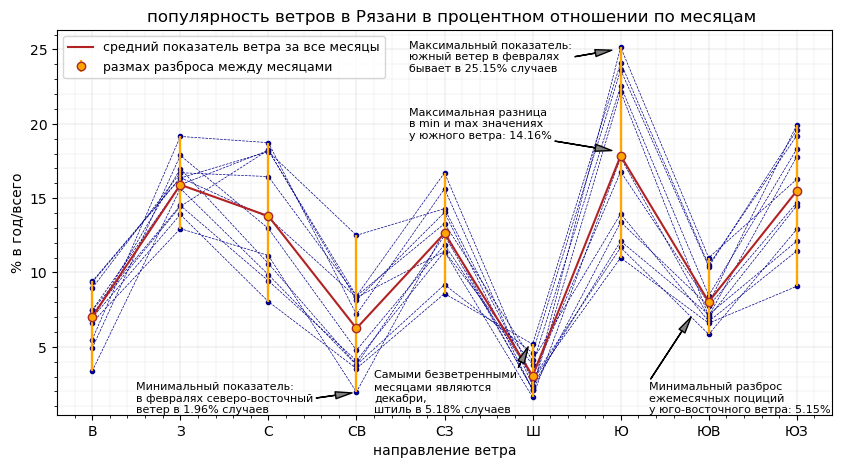

In [16]:
fig4 = plt.figure(figsize=(10, 5))
ax_dwpm = fig4.add_subplot()
for i in dwpm.columns[::]:
    if i == 'total':
        ax_dwpm.plot(dwpm[i], color = 'firebrick', lw = 1.5, label='средний показатель ветра за все месяцы')
    else:
        ax_dwpm.plot(dwpm[i], color = 'DarkBlue', marker='.', ls='--', lw = 0.5)

y = np.array(dwpm['total'])
pogrmin = y - np.array([dwpm.loc[i].min() for i in shortdirects])
pogrmax = np.array([dwpm.loc[i].max() for i in shortdirects]) - y
pogr = [pogrmin, pogrmax]
axerr = ax_dwpm.errorbar(shortdirects, y, yerr=pogr,\
                        color='orange',\
                        ecolor='orange',\
                        elinewidth=1.7,\
                        fmt='o',\
                        markeredgecolor='brown',\
                        label='размах разброса между месяцами')

ax_dwpm.minorticks_on()
ax_dwpm.grid(which='minor', lw=0.1)
ax_dwpm.grid(which='major', lw=0.2)
ax_dwpm.set_xlabel('направление ветра')
ax_dwpm.set_ylabel('% в год/всего')
ax_dwpm.legend(loc=2, fontsize=9)

ax_dwpm.annotate(f'Максимальный показатель:\nюжный ветер в февралях\nбывает в 25.15% случаев', \
                xy=(5.9, 24.95), xytext=(3.6, 23.5), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Минимальный показатель:\nв февралях северо-восточный\nветер в 1.96% случаев', \
                xy=(2.95, 1.9), xytext=(0.5, 0.55), fontsize=8,\
                arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Максимальная разница\nв min и max значениях\nу южного ветра: 14.16%',\
                 xy=(5.9, 18.2), xytext=(3.6, 19), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Минимальный разброс\nежемесячных поциций\nу юго-восточного ветра: 5.15%',\
                 xy=(6.8, 7), xytext=(6.32, 0.55), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})
ax_dwpm.annotate(f'Самыми безветренными\nмесяцами являются\nдекабри,\nштиль в 5.18% случаев',\
                 xy=(4.95, 5), xytext=(3.2, 0.55), fontsize=8,\
                 arrowprops={'width': 0.1, 'headwidth': 5, 'facecolor':'gray'})

fig4.suptitle(f'популярность ветров в Рязани в процентном отношении по месяцам', x=0.52,y=0.92, fontsize=12);

###### разделение ветров на условные летние/зимние категории

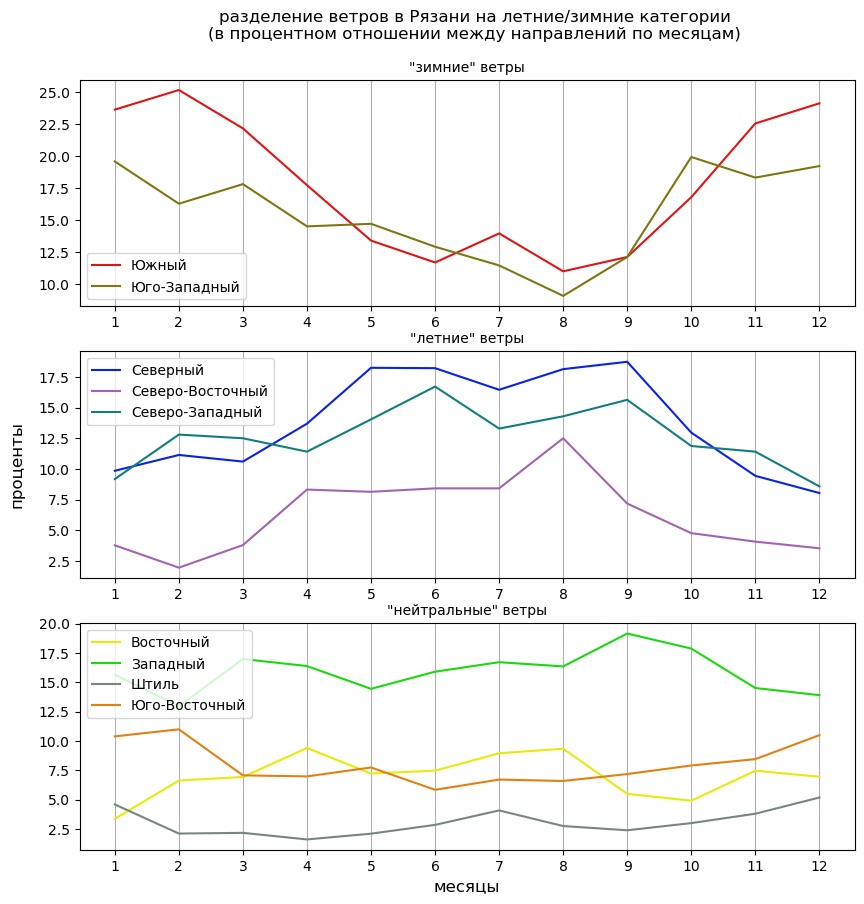

In [32]:
fig5 = plt.figure(figsize=(10, 10))
axwinter = fig5.add_subplot(3, 1, 1)
axsummer = fig5.add_subplot(3, 1, 2)
axneutral = fig5.add_subplot(3, 1, 3)
num = 1
for i in shortdirects:
    if dwpm.loc[i].iloc[[11, 12, 1, 2, 3]].sum() - dwpm.loc[i].iloc[[5, 6, 7, 8, 9]].sum() >= 10:
        axwinter.plot(dwpm.loc[i].iloc[:12],\
                      label=directs[num-1],\
                      color=colors[num-1])
    elif dwpm.loc[i].iloc[[11, 12, 1, 2, 3]].sum() - dwpm.loc[i].iloc[[5, 6, 7, 8, 9]].sum() <= -10:
        axsummer.plot(dwpm.loc[i].iloc[:12],\
                     label=directs[num-1],\
                     color=colors[num-1])
    else:
        axneutral.plot(dwpm.loc[i].iloc[:12],\
                      label=directs[num-1],\
                      color=colors[num-1])
    num += 1    
axwinter.legend(loc=3)
axsummer.legend(loc=2)
axneutral.legend(loc=2)
axwinter.grid(axis='x')
axsummer.grid(axis='x')
axneutral.grid(axis='x')
fig5.suptitle(f'разделение ветров в Рязани на летние/зимние категории\n(в процентном отношении между направлений по месяцам)', x=0.52,y=0.95, fontsize=12)
axsummer.set_ylabel('проценты', fontsize=12, labelpad=10)
axneutral.set_xlabel('месяцы', fontsize=12)
axsummer.set_title(label='"летние" ветры', fontsize=10)
axwinter.set_title(label='"зимние" ветры', fontsize=10)
axneutral.set_title(label='"нейтральные" ветры', fontsize=10);

###### разница между сгруппированными по годам и месяцам данными с округлением до двух знаков

In [18]:
diff = dwpm['total'].sub(dwpy['total']).abs().max()
f'достигает {round(diff, 2)}%!'

'достигает 0.07%!'

### формируем данные по направлению за промежуток времени в процентном отношении

##### каждое направление относительно себя по годам в процентном отношении

In [19]:
# x = weather.groupby(['year', 'wdir']).agg({'wdir': 'count'}).rename(columns={'wdir': 'count'}).reset_index('wdir')
# yeardircount = pd.DataFrame(columns=shortdirects, index=x.index.unique())
# for y in x.index.unique():
#     for d in shortdirects:
#         yeardircount.loc[y][d] = x[x.wdir == d].loc[y].values[1]
# ydc = pd.read_json('yeardircount.json')
# for i in shortdirects:
#     ydc[f'{i}%'] = ydc[i].div(ydc[i].sum()).mul(100).round(2)
# ydc.to_json('yeardircount.json')

In [20]:
ydc = pd.read_json('napravlenie_vetrov/yeardircount.json')
ydc

,В,З,С,СВ,СЗ,Ш,Ю,ЮВ,ЮЗ,В%,З%,С%,СВ%,СЗ%,Ш%,Ю%,ЮВ%,ЮЗ%
1997,32,38,39,19,38,4,39,17,42,5.20,2.73,3.22,3.45,3.43,1.49,2.50,2.43,3.10
1998,22,62,38,18,41,10,60,32,61,3.58,4.45,3.14,3.27,3.70,3.73,3.85,4.56,4.50
1999,24,63,42,24,39,24,64,27,42,3.90,4.52,3.47,4.36,3.52,8.96,4.11,3.85,3.10
2000,26,57,47,23,43,14,55,31,60,4.23,4.09,3.88,4.17,3.88,5.22,3.53,4.42,4.43
2001,26,60,29,18,57,12,54,32,65,4.23,4.30,2.39,3.27,5.15,4.48,3.47,4.56,4.80
2002,15,74,54,27,52,3,59,26,55,2.44,5.31,4.46,4.90,4.70,1.12,3.79,3.71,4.06
2003,26,60,27,16,41,9,89,20,70,4.23,4.30,2.23,2.90,3.70,3.36,5.72,2.85,5.17
2004,22,48,54,31,48,10,57,35,61,3.58,3.44,4.46,5.63,4.34,3.73,3.66,4.99,4.50
2005,29,50,34,19,48,21,49,49,61,4.72,3.59,2.81,3.45,4.34,7.84,3.15,6.99,4.50
2006,17,69,55,24,49,16,65,16,53,2.76,4.95,4.54,4.36,4.43,5.97,4.17,2.28,3.91


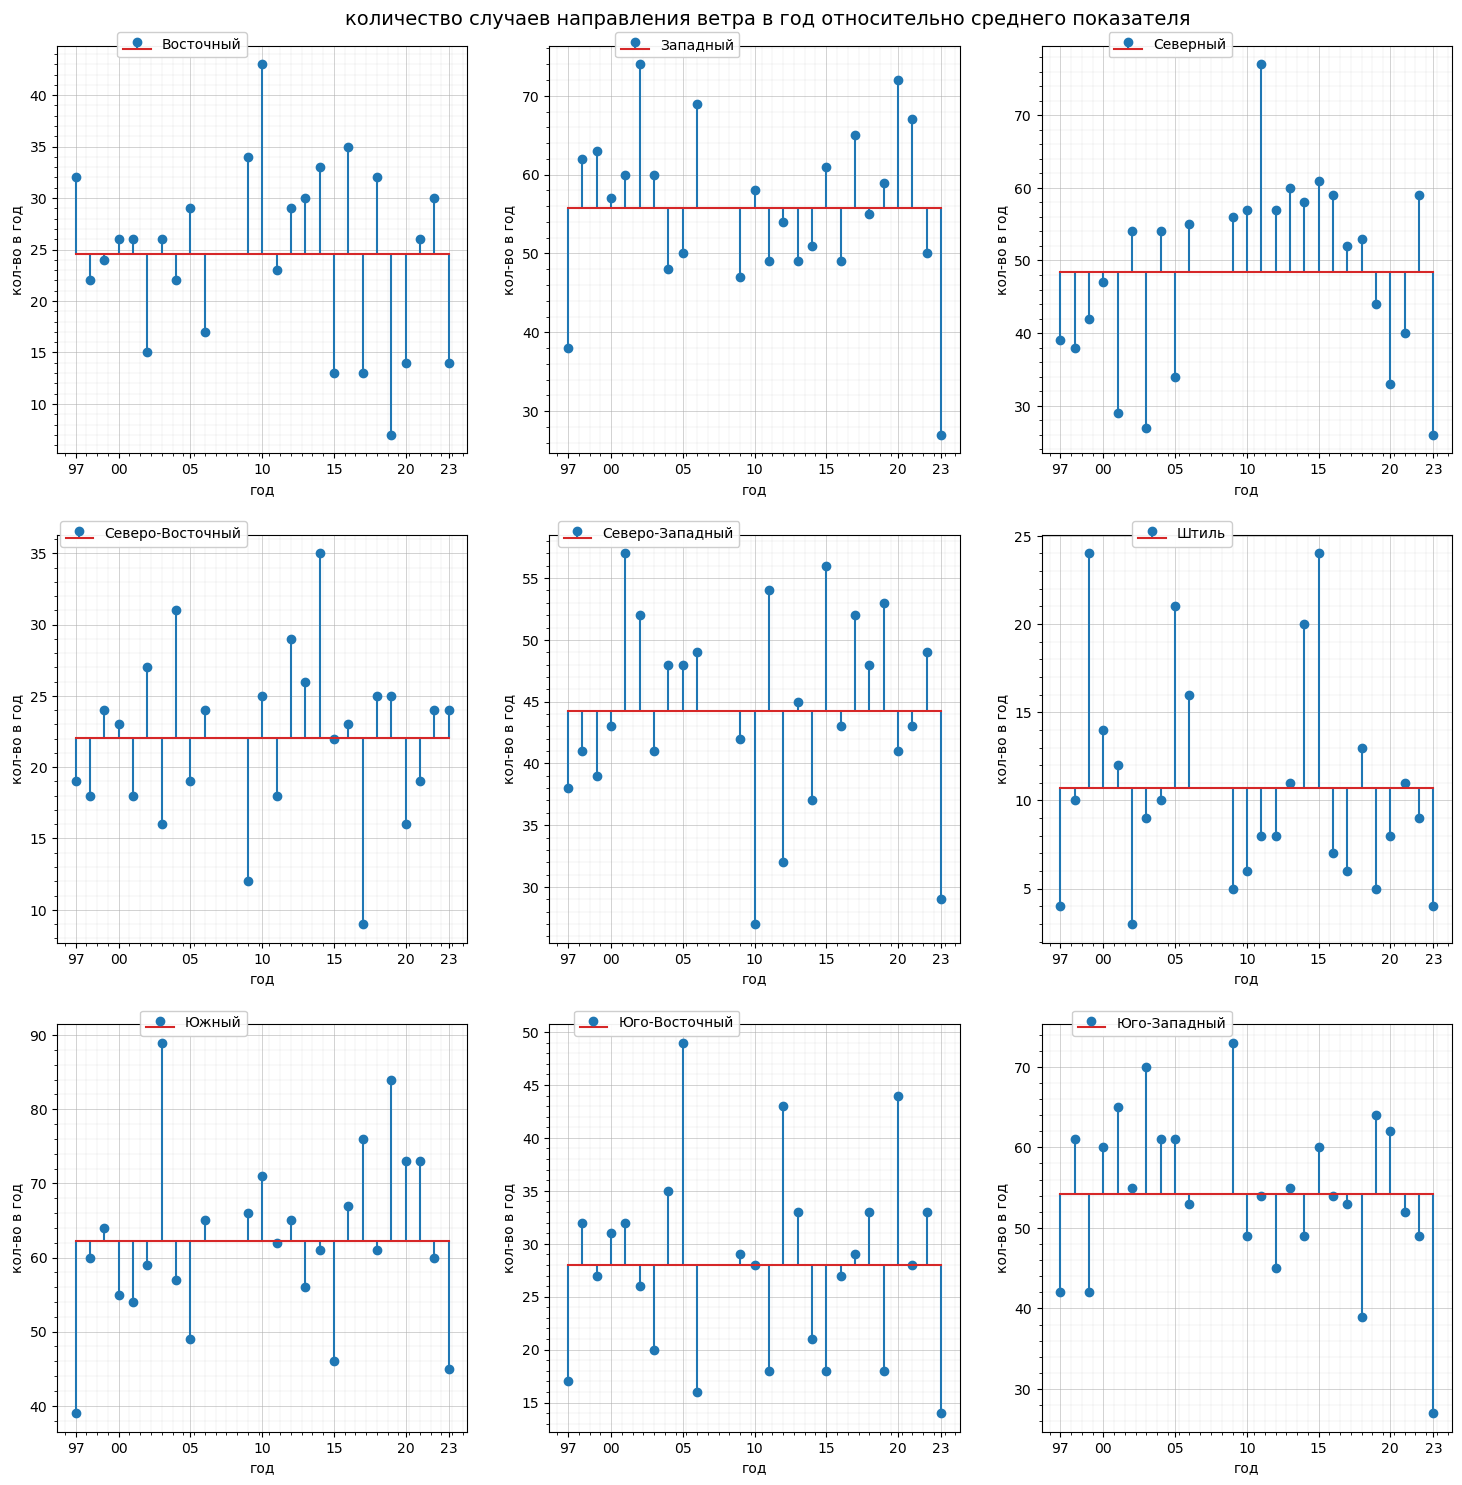

In [21]:
fig6 = plt.figure(figsize=(18, 18))
fig6.suptitle("количество случаев направления ветра в год относительно среднего показателя",x=0.52,y=0.90, fontsize=14)
num = 1
for i in ydc.columns[:9]:
    ax_ydc = fig6.add_subplot(3,3,num)     
    ax_ydc.stem(ydc[i].index, ydc[i].values, bottom=ydc[i].mean(), label = directs[num-1])
    num += 1
    ax_ydc.legend(bbox_to_anchor=(0., 0.95, 0.48, .100), framealpha=0.95)
    ax_ydc.grid()
    ax_ydc.xaxis.set_major_locator(FixedLocator([1997, 2000, 2005, 2010, 2015, 2020, 2023]))
    ax_ydc.xaxis.set_major_formatter(FixedFormatter(["97", "00", "05", "10", "15", "20", "23"]))
    ax_ydc.minorticks_on()
    ax_ydc.grid(which='minor', lw=0.1)
    ax_ydc.grid(which='major', lw=0.4)
    ax_ydc.set_xlabel('год')
    ax_ydc.set_ylabel('кол-во в год')   

##### каждое направление относительно себя по месяцам в процентном отношении

In [22]:
# x = weather.groupby(['month', 'wdir']).agg({'wdir': 'count'}).rename(columns={'wdir': 'count'}).reset_index('wdir')
# monthdircount = pd.DataFrame(columns=shortdirects, index=x.index.unique())
# for m in x.index.unique():
#     for d in shortdirects:
#         monthdircount.loc[m][d] = x[x.wdir == d].loc[m].values[1]
# monthdircount.to_json('monthdircount.json')
# for i in shortdirects:
#     mdc[f'{i}%'] = mdc[i].div(mdc[i].sum()).mul(100).round(2)
# mdc.to_json('monthdircount.json')

In [23]:
mdc = pd.read_json('napravlenie_vetrov/monthdircount.json')
mdc

,В,З,С,СВ,СЗ,Ш,Ю,ЮВ,ЮЗ,В%,З%,С%,СВ%,СЗ%,Ш%,Ю%,ЮВ%,ЮЗ%
1,25,116,73,28,68,34,175,77,145,4.07,8.32,6.03,5.08,6.14,12.69,11.24,10.98,10.70
2,44,86,74,13,85,14,167,73,108,7.15,6.17,6.11,2.36,7.68,5.22,10.73,10.41,7.97
3,51,125,78,28,92,16,163,52,131,8.29,8.97,6.44,5.08,8.31,5.97,10.47,7.42,9.67
4,70,122,102,62,85,12,132,52,108,11.38,8.75,8.42,11.25,7.68,4.48,8.48,7.42,7.97
5,55,110,139,62,107,16,102,59,112,8.94,7.89,11.48,11.25,9.67,5.97,6.55,8.42,8.27
6,55,117,134,62,123,21,86,43,95,8.94,8.39,11.07,11.25,11.11,7.84,5.52,6.13,7.01
7,68,127,125,64,101,31,106,51,87,11.06,9.11,10.32,11.62,9.12,11.57,6.81,7.28,6.42
8,68,119,132,91,104,20,80,48,66,11.06,8.54,10.90,16.52,9.39,7.46,5.14,6.85,4.87
9,39,136,133,51,111,17,86,51,86,6.34,9.76,10.98,9.26,10.03,6.34,5.52,7.28,6.35
10,36,131,95,35,87,22,123,58,146,5.85,9.40,7.84,6.35,7.86,8.21,7.90,8.27,10.77


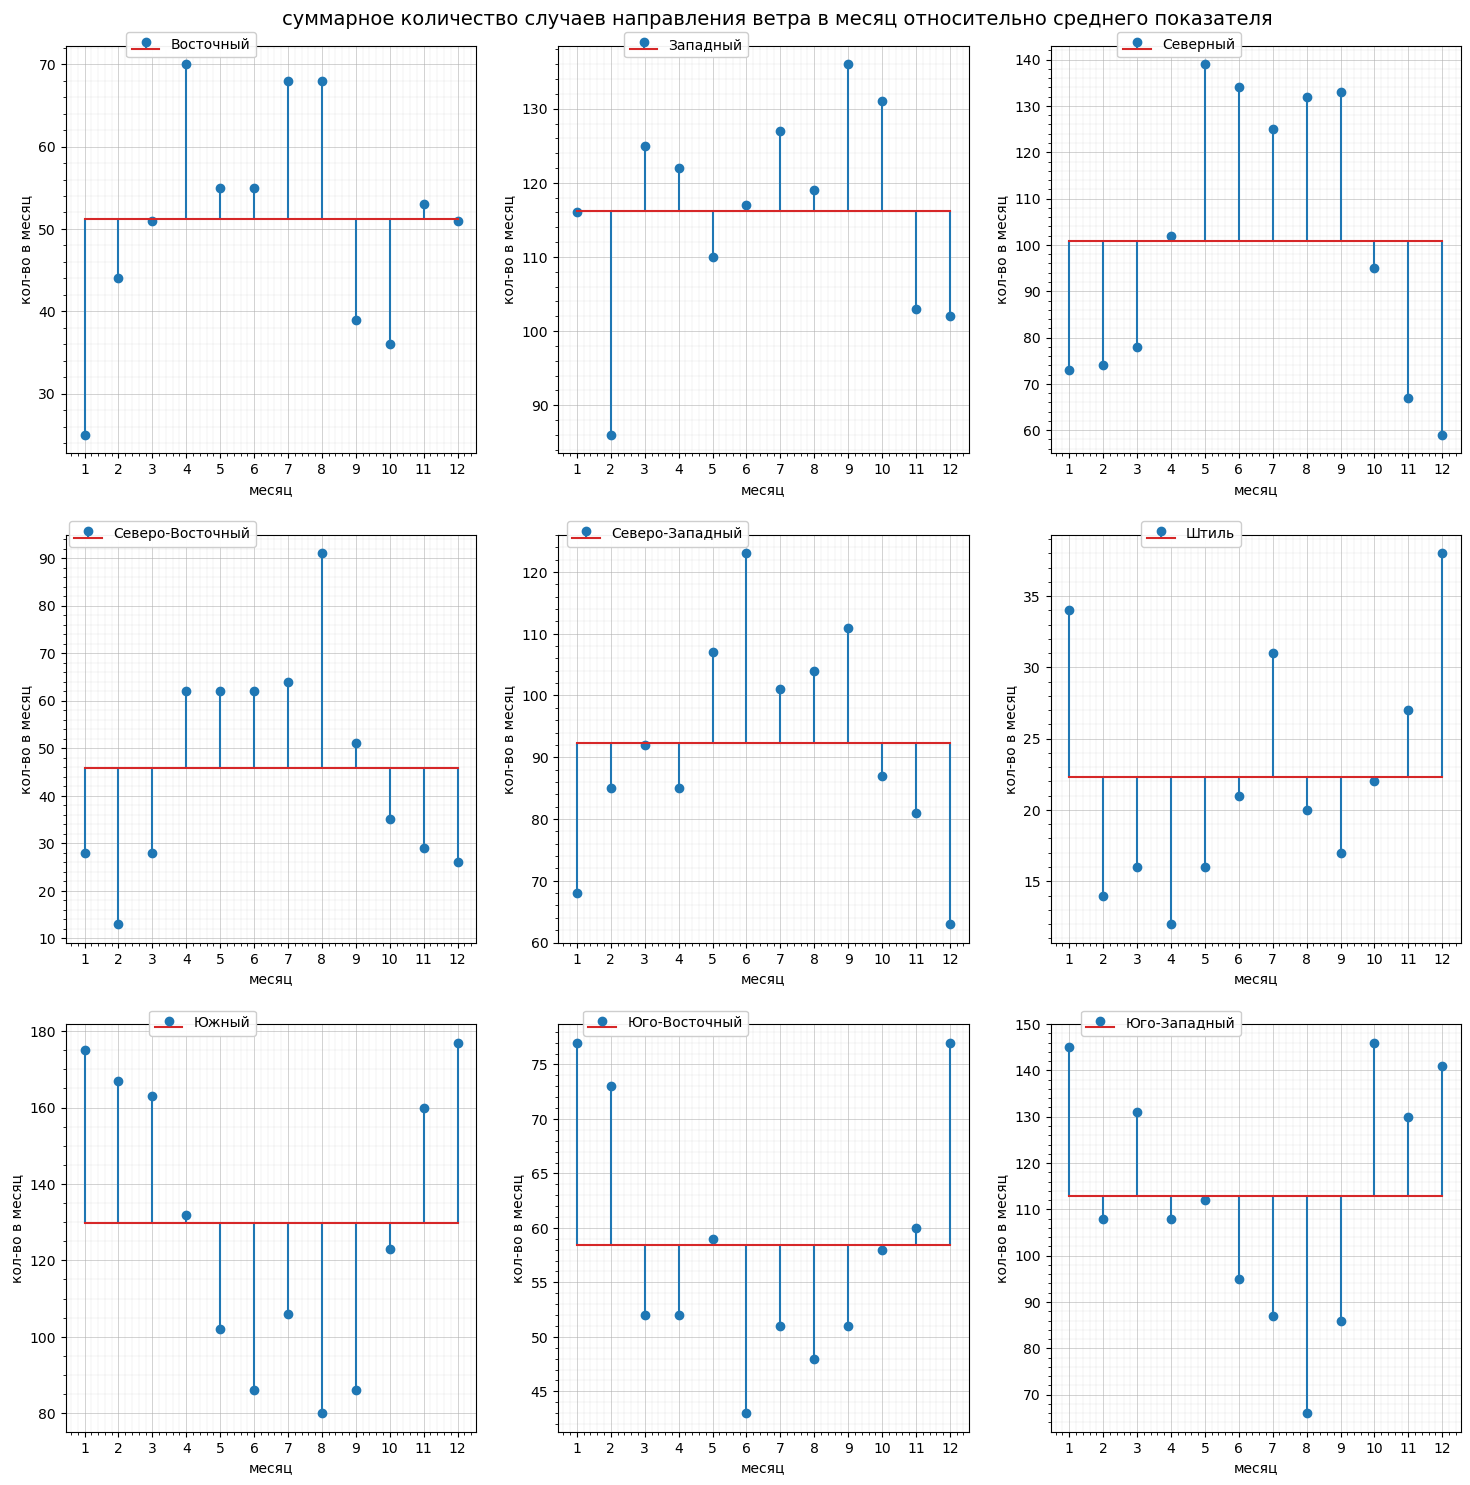

In [24]:
fig7 = plt.figure(figsize=(18, 18))
fig7.suptitle("суммарное количество случаев направления ветра в месяц относительно среднего показателя",x=0.52,y=0.90, fontsize=14)
num = 1
for i in mdc.columns[:9]:
    ax_mdc = fig7.add_subplot(3,3,num)     
    ax_mdc.stem(mdc[i].index, mdc[i].values, bottom=mdc[i].mean(), label = directs[num-1])
    num += 1
    ax_mdc.legend(bbox_to_anchor=(0., 0.95, 0.48, .100), framealpha=0.95)
    ax_mdc.grid()
    ax_mdc.xaxis.set_major_locator(FixedLocator(np.arange(13)))
    ax_mdc.xaxis.set_major_formatter(FixedFormatter(np.arange(13)))
    ax_mdc.minorticks_on()
    ax_mdc.grid(which='minor', lw=0.1)
    ax_mdc.grid(which='major', lw=0.4)
    ax_mdc.set_xlabel('месяц')
    ax_mdc.set_ylabel('кол-во в месяц')   

###### смотрим на максимальную продолжительность ветра в одном направлении

In [25]:
def chislo(row):
    year = row.values[0]
    if row.values[1] < 10:
        month = row.values[1]
        month = f'0{month}'
    else:
        month = row.values[1]
        
    if row.values[2] < 10:
        day = row.values[2]
        day = f'0{day}'
    else:
        day = row.values[2]    
    return f'{year}-{month}-{day}'

maxwdir = weather['wdir'].reset_index()
maxwdir['date'] = maxwdir.apply(chislo, axis=1)

In [26]:
records, direction = [], maxwdir['wdir'].values[1]
x, maxi = 1, 0
mw = maxwdir[['wdir', 'date']].values
for i in range(1, len(mw)):
    if mw[i][0] == direction:
        x += 1
    elif x >= maxi:
        maxi = x        
        records.append([direction, maxi, mw[i-maxi][1], mw[i-1][1]])
        direction = mw[i][0]        
        x = 1     
    elif x < maxi:
        direction = mw[i][0]
        x = 1
    if i + 1 == len(mw) and x >= maxi:
        records.append([direction, maxi, mw[i-maxi][1], mw[i-1][1]])
if records[-1][1] == records[-2][1]:
    ret = records[-1:-3:-1]
    for i in records[-3:: -1]:
        if i[1] == ret[0][1]:
            ret.append(i)
        elif i[1] < ret[0][1]:
            break
    for i in ret:
        print(f'наибольшая продолжительность ветра в одном направлении составляет {i[1]} дней(дня),\n\
ветер в {i[0]} направлении был с {i[2]} по {i[3]}')
else:
     print(f'наибольшая продолжительность ветра в одном направлении составляет {records[-1][1]} дней(дня),\n\
ветер в {records[-1][0]} направлении был с {records[-1][2]} по {records[-1][3]}')

наибольшая продолжительность ветра в одном направлении составляет 9 дней(дня),
ветер в Ю направлении был с 2020-10-05 по 2020-10-13
